In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))
inputs.shape, inputs.dtype

(TensorShape([None, 784]), tf.float32)

In [3]:
x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [4]:
model = keras.Model(inputs = inputs, outputs = outputs, name = "A_model")

In [5]:
model.summary()

Model: "A_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


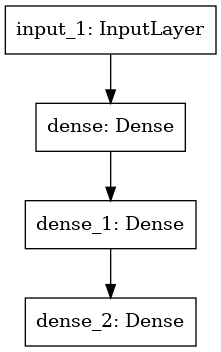

In [8]:
keras.utils.plot_model(model)

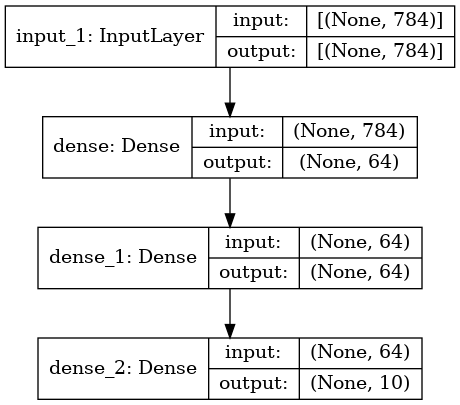

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(60000, 784).astype("float32")
x_test = x_test.reshape(10000, 784).astype("float32")

In [21]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"]
)

In [22]:
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split = 0.2)

Epoch 1/2
750/750 [==============================] - 1s 1ms/step - loss: 6.0683 - accuracy: 0.7459 - val_loss: 0.7131 - val_accuracy: 0.8758
Epoch 2/2
750/750 [==============================] - 1s 948us/step - loss: 0.5345 - accuracy: 0.9057 - val_loss: 0.3887 - val_accuracy: 0.9273


In [24]:
test_scores = model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.3916 - accuracy: 0.9266


In [27]:
encoder_input = keras.Input(shape=(28,28,1), name = "img")

x = layers.Conv2D(16,3, activation = "relu")(encoder_input)
x = layers.Conv2D(32,3, activation = "relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32,3, activation = "relu")(x)
x = layers.Conv2D(16,3, activation = "relu")(x)
encoder_output = layers.GlobalMaxPool2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name = "enconder")
encoder.summary()

Model: "enconder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0  

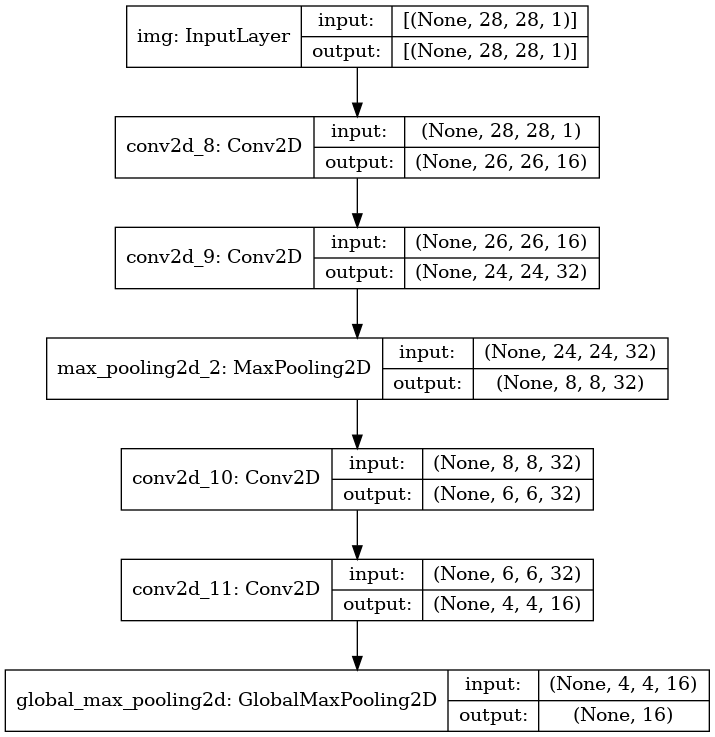

In [29]:
keras.utils.plot_model(encoder,show_shapes=True)